In [1]:
from common import *
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
set_seed(0)
df = load_data()
df.head()

,x,y,label,NDAI,SD,CORR,angle_DF,angle_CF,angle_BF,angle_AF,angle_AN,source
0,373.0,65.0,-1.0,-0.228591,1.752265,0.105434,271.62891,261.33844,251.83549,233.98555,219.14351,Image 1
1,374.0,65.0,-1.0,-0.205959,1.875819,0.113432,272.31284,262.95920,252.11003,234.83566,218.55107,Image 1
2,375.0,65.0,-1.0,0.019373,2.286991,0.114524,274.61032,263.17834,251.78252,233.68451,219.46140,Image 1
3,376.0,65.0,-1.0,-0.303432,2.822642,0.107892,276.65012,261.89957,250.35201,234.05057,220.41025,Image 1
4,377.0,65.0,-1.0,-0.675589,3.656925,0.102998,275.60010,259.69360,250.37851,234.48888,221.05806,Image 1


In [3]:
from sklearn.preprocessing import StandardScaler

df_labeled = df.loc[df["label"] != 0]
features = df_labeled.columns[3:-1]
# Separating out the features
x = df_labeled.loc[:, features].values
# Separating out the target
y = df_labeled.loc[:,['label']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)


In [4]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2', 'principal component 3'])
principalDf.head()


,principal component 1,principal component 2,principal component 3
0,-1.551724,-0.595909,0.140381
1,-1.546093,-0.521583,0.125286
2,-1.490689,-0.417851,0.218537
3,-1.558547,-0.494627,0.195634
4,-1.606441,-0.611261,0.190384


In [5]:
pca.explained_variance_ratio_

array([ 0.65053332,  0.192101  ,  0.09604024])

In [6]:
pca.explained_variance_

array([ 5.20429154,  1.53681541,  0.7683256 ])

In [7]:
print("total variance explained ", sum(pca.explained_variance_ratio_))

total variance explained  0.938674557455


In [8]:
pd.DataFrame(pca.components_, columns=df_labeled.columns[3:-1], index=['PC-1','PC-2','PC-3'])

,NDAI,SD,CORR,angle_DF,angle_CF,angle_BF,angle_AF,angle_AN
PC-1,0.308012,0.275721,0.273827,-0.263618,-0.381593,-0.423665,-0.427086,-0.420861
PC-2,0.326351,0.262428,0.535786,0.614792,0.369060,0.132515,-0.019722,-0.073730
PC-3,0.426196,0.701700,-0.425852,-0.126386,-0.025285,0.116925,0.213810,0.261964


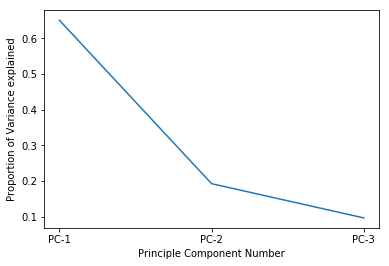

In [9]:
plt.plot(range(1,4), pca.explained_variance_ratio_)
plt.xlabel('Principle Component Number')
plt.ylabel('Proportion of Variance explained') 
plt.xticks(range(1,4), ['PC-1','PC-2','PC-3']);

In [11]:
# https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60
# https://stackoverflow.com/questions/22984335/recovering-features-names-of-explained-variance-ratio-in-pca-with-sklearn


In [14]:
df_labeled.iloc[:,2:].corr()

,label,NDAI,SD,CORR,angle_DF,angle_CF,angle_BF,angle_AF,angle_AN
label,1.000000,0.758410,0.436026,0.551004,0.010787,-0.282757,-0.447665,-0.507321,-0.504600
NDAI,0.758410,1.000000,0.647447,0.535021,-0.163996,-0.438473,-0.571011,-0.611994,-0.608525
SD,0.436026,0.647447,1.000000,0.407306,-0.196574,-0.407029,-0.491237,-0.514334,-0.506879
CORR,0.551004,0.535021,0.407306,1.000000,0.147762,-0.229094,-0.518211,-0.684018,-0.746075
angle_DF,0.010787,-0.163996,-0.196574,0.147762,1.000000,0.850304,0.670344,0.537794,0.489264
angle_CF,-0.282757,-0.438473,-0.407029,-0.229094,0.850304,1.000000,0.918958,0.825947,0.779520
angle_BF,-0.447665,-0.571011,-0.491237,-0.518211,0.670344,0.918958,1.000000,0.962479,0.925560
angle_AF,-0.507321,-0.611994,-0.514334,-0.684018,0.537794,0.825947,0.962479,1.000000,0.981917
angle_AN,-0.504600,-0.608525,-0.506879,-0.746075,0.489264,0.779520,0.925560,0.981917,1.000000
